In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load in corpus and apply cleaning/preprocessing
df = pd.read_csv("ProjClean.csv", encoding='latin-1')
df['text'] = df['StatementOfWork'].str.replace('\n', '')
df.head()
df = df[pd.notnull(df['text'])].reset_index() #added
df['text'] = df.text.str.replace('\d+', '') #remove all numerical values
df['text'] = df.text.str.replace(r'\b[A-Z]+\b', '') #remove leftover acronyms not useful
df['text'] = df.text.str.replace('[^A-Za-z0-9]+', ' ') #remove special characters
df['text'] = df.text.str.replace('_','') #remove underscores
texts=df['text']

In [3]:
# EDA
df['word_count'] = df['StatementOfWork'].apply(lambda x : len(x.split()))
df['char_count'] = df['StatementOfWork'].apply(lambda x : len(x.replace(" ","")))
df['word_density'] = df['word_count'] / (df['char_count'] + 1)
df[['word_count', 'char_count', 'word_density']].head(10)

,word_count,char_count,word_density
0,7,38,0.179487
1,2,17,0.111111
2,15,66,0.223881
3,22,143,0.152778
4,15,78,0.189873
5,5,26,0.185185
6,15,109,0.136364
7,16,77,0.205128
8,2,19,0.100000
9,7,41,0.166667


In [4]:
#Identify common words
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:20]
print(freq)

the           18579
and           15275
of            15003
to            13786
for           10946
is             6468
a              6076
The            5776
in             4987
University     3260
be             3005
as             2783
on             2722
will           2688
with           2589
s              2524
an             2480
this           2167
This           2004
by             1975
dtype: int64


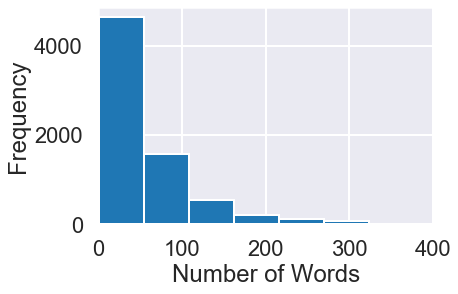

In [18]:
ds = df.word_count
sns.set_context("poster")
with sns.axes_style("darkgrid"):
    ds.plot.hist(20)
    plt.xlim(0, 400)
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()
    #plt.savefig("fig/Word_Count.png")

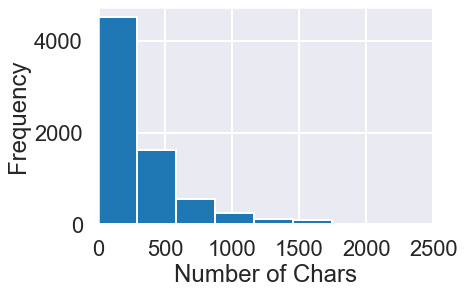

In [41]:
ds = df.char_count
sns.set_context("poster")
with sns.axes_style("darkgrid"):
    ds.plot.hist(20)
    plt.xlim(0, 2500)
    plt.xlabel('Number of Chars')
    plt.ylabel('Frequency')
    plt.show()
    #plt.savefig("fig/Char_Count.png")

In [27]:
# Number of vendors for each project ID can be used to see how "popular" a project was. This can be used to show how 
# the current taxonomy leads to some projects within a category having a substantially larger amount of bids.
df2 = pd.read_csv("VendClean.csv", encoding='latin-1')
by_proj_ven=df2.groupby('ProjectID')['VendorID'].count()

/anaconda3/envs/WildFire/lib/python3.7/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


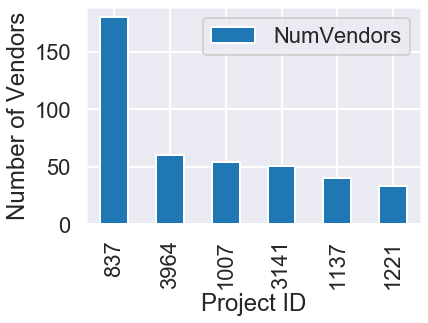

In [37]:
# Get projects associated with each ID
proj = pd.Series(df['UNSPSC Level 2 Description'], index=df['ProjectID'])
filtered = proj[by_proj_ven.index] #index is projectID
proj_by_num_ven = pd.concat([filtered,by_proj_ven],axis=1)
proj_by_num_ven.columns = ['Description', 'NumVendors']
proj_by_num_ven

# Lets examine one category of projects
bldg = proj_by_num_ven[proj_by_num_ven['Description']=='Building and facility maintenance and repair services']
var = bldg.sort_values('NumVendors', ascending=False)[:10].drop_duplicates()

ds = var
with sns.axes_style("darkgrid"):
    ds.plot.bar()
    plt.xlabel('Project ID')
    plt.ylabel('Number of Vendors')
    plt.show()
    #plt.savefig("fig/Char_Count.png")